In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib

In [85]:
df = pd.read_csv('cleanup_house.csv',index_col=[0])

In [86]:
df.head()

,Title,Location,Security,Garage,Concierge,Price,City,Currency,Nmbr of rooms,Nmbr of pieces,Nmbr of bathrooms,Newness,Surface
0,Appartement de luxe en Vente Haut Agdal,HautAgdal,0,0,0,4207500.0,Rabat,DH,3.0,6.0,3.0,Bon état,255
1,Appartement à vendre au RDC,Agdal,0,0,0,3900000.0,Rabat,DH,3.0,6.0,2.0,Bon état,196
2,"Appartement de 99m² avec terrasse en vente, Ré...",Kébibat,0,0,0,NaN,Rabat,NaN,2.0,3.0,2.0,NaN,99
3,Vente Appartement Rabat Hay Riad,Riyad,0,0,0,2500000.0,Rabat,DH,3.0,5.0,1.0,Bon état,130
4,Penthouse à vendre à L'orangeraie Souissi 340m2,Souissi,0,0,0,6500000.0,Rabat,DH,4.0,5.0,3.0,Bon état,340


In [87]:
df.shape

(7562, 13)

In [88]:
df.describe()

,Security,Garage,Concierge,Price,Nmbr of rooms,Nmbr of pieces,Nmbr of bathrooms,Surface
count,7562.000000,7562.000000,7562.00000,6.259000e+03,7413.000000,7421.000000,7236.000000,7562.000000
mean,0.030547,0.017323,0.01653,3.206828e+06,3.196682,4.817680,2.407960,334.759852
std,0.172100,0.130482,0.12751,6.564920e+06,1.895447,2.795364,1.664114,1050.479494
min,0.000000,0.000000,0.00000,7.000000e+03,1.000000,1.000000,1.000000,12.000000
25%,0.000000,0.000000,0.00000,7.895000e+05,2.000000,3.000000,1.000000,83.000000
50%,0.000000,0.000000,0.00000,1.550000e+06,3.000000,4.000000,2.000000,120.000000
75%,0.000000,0.000000,0.00000,3.212500e+06,4.000000,6.000000,3.000000,220.000000
max,1.000000,1.000000,1.00000,2.200000e+08,50.000000,36.000000,34.000000,25000.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7562 entries, 0 to 7562
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              7562 non-null   object 
 1   Location           7562 non-null   object 
 2   Security           7562 non-null   int64  
 3   Garage             7562 non-null   int64  
 4   Concierge          7562 non-null   int64  
 5   Price              6259 non-null   float64
 6   City               7562 non-null   object 
 7   Currency           6259 non-null   object 
 8   Nmbr of rooms      7413 non-null   float64
 9   Nmbr of pieces     7421 non-null   float64
 10  Nmbr of bathrooms  7236 non-null   float64
 11  Newness            6688 non-null   object 
 12  Surface            7562 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 827.1+ KB


## Dealing with missing values

In [90]:
df.isnull().sum()

Title                   0
Location                0
Security                0
Garage                  0
Concierge               0
Price                1303
City                    0
Currency             1303
Nmbr of rooms         149
Nmbr of pieces        141
Nmbr of bathrooms     326
Newness               874
Surface                 0
dtype: int64

In [91]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()]
for feature in features_with_na:
    print(f'{feature} have {np.round(df[feature].isnull().mean(),4)} missing values')

Price have 0.1723 missing values
Currency have 0.1723 missing values
Nmbr of rooms have 0.0197 missing values
Nmbr of pieces have 0.0186 missing values
Nmbr of bathrooms have 0.0431 missing values
Newness have 0.1156 missing values


In [92]:
df['Nmbr of rooms'].unique()

array([ 3.,  2.,  4.,  6.,  5.,  1., 13.,  7.,  8.,  9., 10., nan, 11.,
       16., 14., 50., 15., 12., 36., 23., 21., 18., 22., 34.])

In [93]:
df['Nmbr of rooms'].value_counts()

2.0     2448
3.0     2397
4.0      956
5.0      501
1.0      476
6.0      270
7.0      166
8.0       99
10.0      28
9.0       22
12.0      14
11.0      13
14.0       5
13.0       4
16.0       3
15.0       3
23.0       2
50.0       1
36.0       1
21.0       1
18.0       1
22.0       1
34.0       1
Name: Nmbr of rooms, dtype: int64

In [94]:
## fill the null values with mode in discret variables
df['Nmbr of rooms'] = df['Nmbr of rooms'].fillna(df['Nmbr of rooms'].mode()[0])
df['Nmbr of pieces'] = df['Nmbr of pieces'].fillna(df['Nmbr of pieces'].mode()[0])
df['Nmbr of bathrooms'] = df['Nmbr of bathrooms'].fillna(df['Nmbr of bathrooms'].mode()[0])

In [95]:
df.isnull().sum()

Title                   0
Location                0
Security                0
Garage                  0
Concierge               0
Price                1303
City                    0
Currency             1303
Nmbr of rooms           0
Nmbr of pieces          0
Nmbr of bathrooms       0
Newness               874
Surface                 0
dtype: int64

In [96]:
df['Newness'].unique()

array(['Bon état', nan, 'Nouveau', 'À rénover'], dtype=object)

In [97]:
df['Newness'].value_counts()

Bon état     3856
Nouveau      2541
À rénover     291
Name: Newness, dtype: int64

In [98]:
df['Newness'] = df['Newness'].fillna(df['Newness'].mode()[0])

In [99]:
df.isnull().sum()

Title                   0
Location                0
Security                0
Garage                  0
Concierge               0
Price                1303
City                    0
Currency             1303
Nmbr of rooms           0
Nmbr of pieces          0
Nmbr of bathrooms       0
Newness                 0
Surface                 0
dtype: int64

##### formation variables

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7562 entries, 0 to 7562
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              7562 non-null   object 
 1   Location           7562 non-null   object 
 2   Security           7562 non-null   int64  
 3   Garage             7562 non-null   int64  
 4   Concierge          7562 non-null   int64  
 5   Price              6259 non-null   float64
 6   City               7562 non-null   object 
 7   Currency           6259 non-null   object 
 8   Nmbr of rooms      7562 non-null   float64
 9   Nmbr of pieces     7562 non-null   float64
 10  Nmbr of bathrooms  7562 non-null   float64
 11  Newness            7562 non-null   object 
 12  Surface            7562 non-null   int32  
dtypes: float64(4), int32(1), int64(3), object(5)
memory usage: 797.6+ KB


In [100]:
df["Surface"] = df["Surface"].astype(int)

###### detection outliers

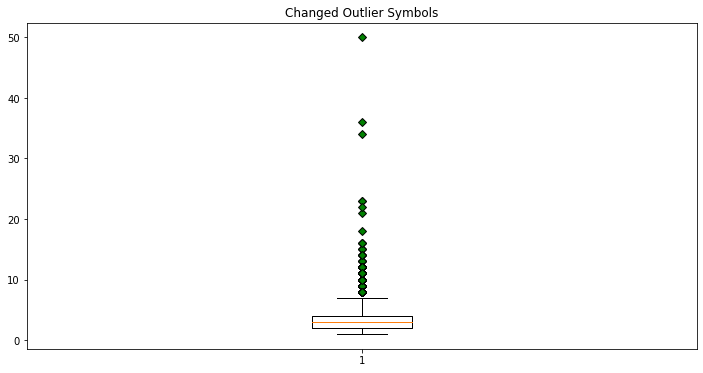

In [102]:
# number outliers rooms
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(df['Nmbr of rooms'], flierprops=green_diamond)
plt.show()

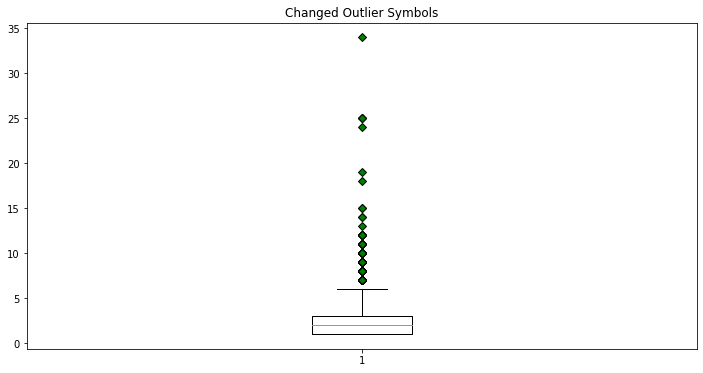

In [103]:
# number of bathrooms
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(df['Nmbr of bathrooms'], flierprops=green_diamond)
plt.show()

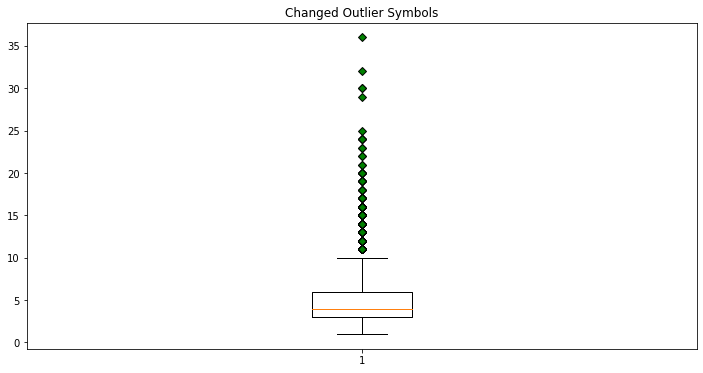

In [104]:
# Nmbr of pieces
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(df['Nmbr of pieces'], flierprops=green_diamond)
plt.show()

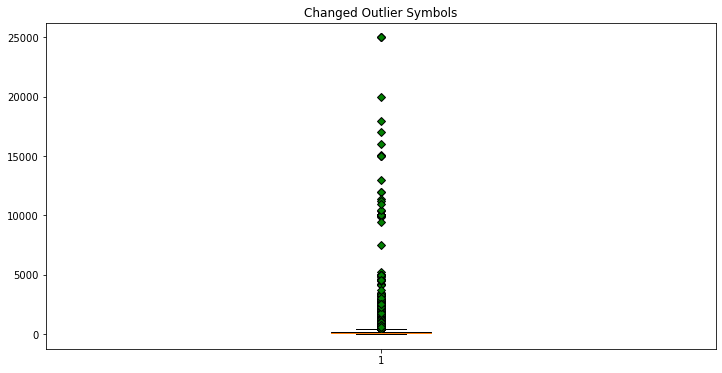

In [105]:
# surface
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(df['Surface'], flierprops=green_diamond)
plt.show()

In [106]:
Q1 = df['Surface'].quantile(0.25)
Q3 = df['Surface'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

137.0


In [108]:
df_outliers_surface = (df['Surface'] < (Q1 - 1.5 * IQR)) |(df['Surface'] > (Q3 + 1.5 * IQR))

In [110]:
df_outliers_surface.value_counts()

False    6509
True     1053
Name: Surface, dtype: int64

# Visualitation

In [3]:
df.columns

Index(['Title', 'Location', 'Security', 'Garage', 'Concierge', 'Price', 'City',
       'Currency', 'Nmbr of rooms', 'Nmbr of pieces', 'Nmbr of bathrooms',
       'Newness', 'Surface'],
      dtype='object')

In [26]:
df.groupby(['Nmbr of rooms']).size().sort_values(ascending=False)

Nmbr of rooms
3     732
2     676
4     346
5     186
1     163
6     102
7      44
8      23
10     14
9       8
12      7
11      3
14      2
13      1
15      1
18      1
23      1
36      1
dtype: int64

In [29]:
rooms_values = df['Nmbr of rooms'].value_counts().values

In [31]:
rooms_number = df['Nmbr of rooms'].value_counts().index

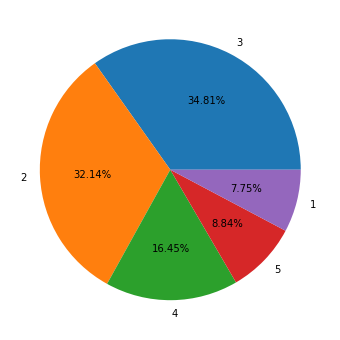

In [34]:
plt.pie(rooms_values[:5],labels=rooms_number[:5],autopct='%1.2f%%')
plt.show()

In [5]:
df.columns

Index(['Title', 'Location', 'Security', 'Garage', 'Concierge', 'Price', 'City',
       'Currency', 'Nmbr of rooms', 'Nmbr of pieces', 'Nmbr of bathrooms',
       'Newness', 'Surface'],
      dtype='object')

In [3]:
Rooms_City_count = df.groupby(['Nmbr of rooms','City']).size().reset_index().rename(columns={0:'Rooms Count'})

In [24]:
Rooms_City_count_agadir = Rooms_City_count.loc[(Rooms_City_count['City'] == 'Agadir')]

In [32]:
Rooms_City_count_agadir

,Nmbr of rooms,City,Rooms Count
0,1,Agadir,52
5,2,Agadir,186
10,3,Agadir,106
15,4,Agadir,68
20,5,Agadir,38
25,6,Agadir,18
30,7,Agadir,7
35,8,Agadir,3
40,9,Agadir,2
44,10,Agadir,5


<AxesSubplot:xlabel='Nmbr of rooms', ylabel='Rooms Count'>

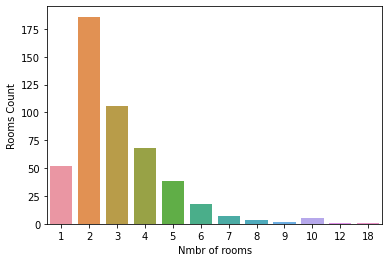

In [37]:
sns.barplot(data=Rooms_City_count_agadir,x='Nmbr of rooms',y='Rooms Count')

<AxesSubplot:xlabel='Nmbr of rooms', ylabel='Rooms Count'>

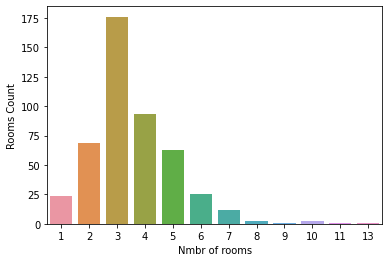

In [38]:
Rooms_City_count_rabat = Rooms_City_count.loc[(Rooms_City_count['City'] == 'Rabat')]
sns.barplot(data=Rooms_City_count_rabat,x='Nmbr of rooms',y='Rooms Count')

In [4]:
Rooms_City_count

,Nmbr of rooms,City,Rooms Count
0,1,Agadir,52
1,1,Casablanca,38
2,1,Fès,7
3,1,Marrakech,42
4,1,Rabat,24
5,2,Agadir,186
6,2,Casablanca,163
7,2,Fès,145
8,2,Marrakech,113
9,2,Rabat,69


<AxesSubplot:xlabel='Nmbr of rooms', ylabel='Rooms Count'>

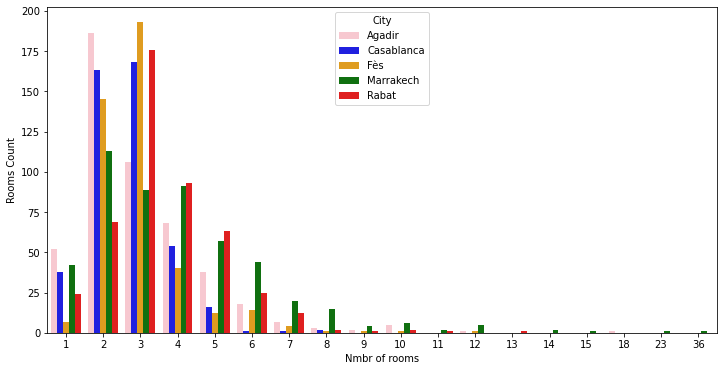

In [8]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Nmbr of rooms',y='Rooms Count',hue='City',data=Rooms_City_count,palette=['pink','blue','orange','green','red','purple'])